#  Curve fitting and the $\chi^2$ error surface
#### Material to accompany Hughes and Hase Section 6.5

####  Imports

In [ ]:
import numpy as np
from scipy import optimize
from scipy import stats

import matplotlib as mpl       # As of July 2017 Bucknell computers use v. 2.x 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [ ]:
%matplotlib notebook
# As of Aug. 2017 reverting to 1.x defaults.
# In 2.x text.ustex requires dvipng, texlive-latex-extra, and texlive-fonts-recommended, 
# which don't seem to be universal
# See https://stackoverflow.com/questions/38906356/error-running-matplotlib-in-latex-type1cm?
mpl.style.use('classic')
        
# M.L. modifications of matplotlib defaults using syntax of v.2.0 
# More info at http://matplotlib.org/2.0.0/users/deflt_style_changes.html
# Changes can also be put in matplotlibrc file, or effected using mpl.rcParams[]
plt.rc('figure', figsize = (6, 4.5))            # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True)             # Adjusts supblot parameters for new size


#### Define linear function

In [3]:
def f(x,m,b):
    return x*m + b

def chi2(x, y, u, m, b):
    return np.sum((y - f(x, m, b))**2/u**2)

## Linear fit to data for $m$ and $b$

#### Data to be fit:

In [4]:
# Or: data = np.loadtxt("file.dat")  
# Format:  [[x1,y1,u1], [x2,y2,u2], ... ]   where u1 is uncertainty in y1
data = np.array([[1, 2.947032612427293, 0.5],
 [2, 6.168779380682309, 0.5],
 [3, 7.1618838821688, 0.5],
 [4, 9.590549514954866, 0.5],
 [5, 11.20657, 0.5]])

x, y, u = data.T

<IPython.core.display.Javascript object>


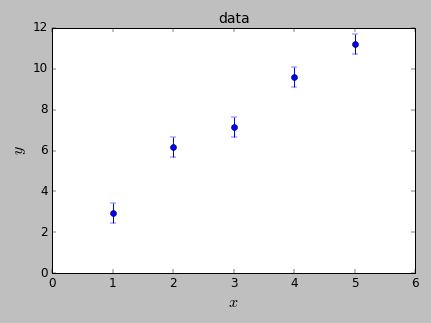

In [5]:
xfine = np.linspace(0,6,201)  # "quasi-continuous" set of x's for plotting function
plt.figure()
plt.title("data",fontsize=14)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axhline(0,color='magenta')
plt.xlim(0,6) 
plt.errorbar(x,y,yerr=u,fmt='o');

#### Perform fit

In [6]:
popt, pcov = optimize.curve_fit(f, x, y, sigma=u, absolute_sigma=True)

slope = popt[0]
alpha_m = np.sqrt(pcov[0,0])
intercept = popt[1]
alpha_b = np.sqrt(pcov[1,1])

print("slope =", slope,"+/-", alpha_m,"\n")
print("intercept =", intercept,"+/-", alpha_b,"\n")

print("covariance matrix =","\n",pcov,"\n")
pcov_data = pcov

print("chi2 =", chi2(x, y, u,*popt))
print("reduced chi2 = chi2/(len(x)-len(popt)) =",chi2(x, y, u, *popt)/(len(x)-len(popt)))

a = chi2(x,y,u,*popt)

slope = 1.994084490943965 +/- 0.15811389158461894 

intercept = 1.4327096052222066 +/- 0.5244044422749461 

covariance matrix = 
 [[ 0.025      -0.07500001]
 [-0.07500001  0.27500002]] 

chi2 = 3.700621429959703
reduced chi2 = chi2/(len(x)-len(popt)) = 1.2335404766532343


<IPython.core.display.Javascript object>


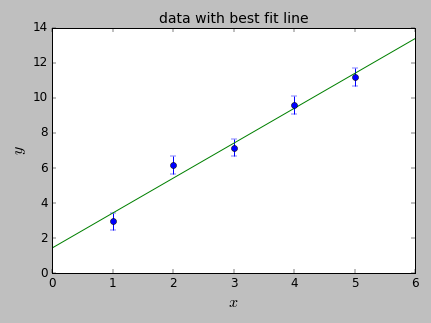

In [7]:
xc = np.linspace(0,6,201)  # "quasi-continuous" set of x's for plotting of function
plt.figure()
plt.title("data with best fit line",fontsize=14)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axhline(0, color='magenta')
plt.xlim(0,6)  # Pad x-range on plot
plt.errorbar(x, y, yerr=u, fmt='o');
plt.plot(xc ,f(xc, slope, intercept));

#### Residuals:

<IPython.core.display.Javascript object>


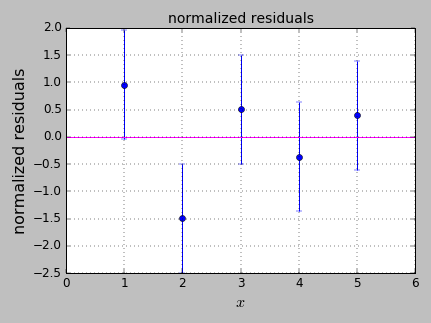

In [8]:
plt.figure()
plt.axhline(0,color='magenta')
plt.title('normalized residuals',fontsize=14)
plt.xlabel('$x$')
plt.ylabel('normalized residuals')
plt.grid(True)
plt.errorbar(x,(f(x,slope,intercept)-y)/u,1,fmt='o')
plt.xlim(0,6);

#### Make "data" for contour plot
+ Choose ranges of $m$ and $b$ for contour plot
+ Make meshgrid of slope and intercept values
+ Calculate values of $\chi^2$ at grid points

In [9]:
m = np.linspace(1.5,2.5,201)
b = np.linspace(0.5,2.5,201)
M, B = np.meshgrid(m, b, indexing='ij')

Z = np.zeros((len(m),len(b)))

for i in range(len(m)):
    for j in range(len(b)):
        Z[i,j] = chi2(x, y, u, m[i],b[j]) - chi2(x, y, u, *popt)

<IPython.core.display.Javascript object>


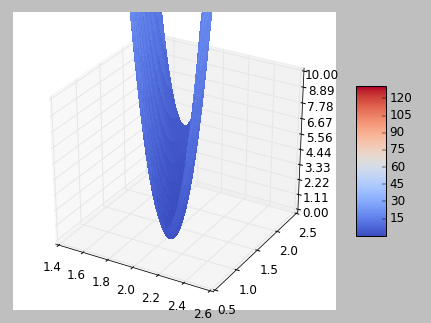

In [11]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(M, B, Z, cmap=cm.coolwarm,
                      linewidth=0, antialiased=False)
#surf = ax.plot_surface(M, B, Z, 
#                     linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 10)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5);

<IPython.core.display.Javascript object>


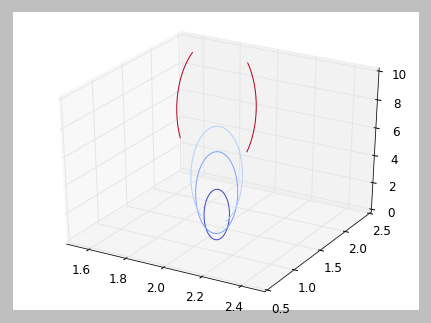

(0, 10)

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#M, B, Z = axes3d.get_test_data(0.05)
cset = ax.contour(M, B, Z, cmap=cm.coolwarm, levels=[1,2.7,4,9])
ax.clabel(cset, fontsize=9, inline=1)
ax.set_zlim(0,10)

<IPython.core.display.Javascript object>


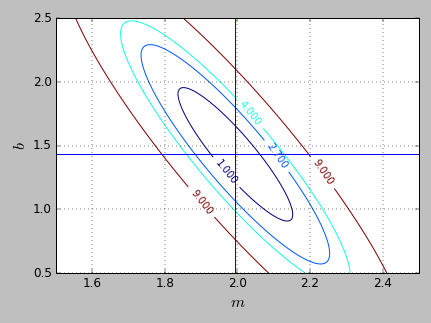

In [14]:
plt.figure()
CS = plt.contour(M, B, Z, levels=[1,2.7,4,9])
plt.xlabel('$m$')
plt.ylabel('$b$')
plt.grid()
plt.axhline(intercept)
#plt.axhline(intercept + alpha_b, linestyle='--')
#plt.axhline(intercept - alpha_b, linestyle='--')
plt.axvline(slope)
#plt.axvline(slope + alpha_m,linestyle='--')
#plt.axvline(slope - alpha_m,linestyle='--')
plt.clabel(CS, inline=1, fontsize=10);

In [15]:
n_sim = 100000
count = 0
for i in range(n_sim):
    mSim = np.array([])      # Array for values of slope from simulated sets
    bSim = np.array([])      # Array for values of intercept from simulated sets
    chi_sim = np.array([])

for i in range(n_sim):
    ySim = stats.norm.rvs(slope*x+intercept,u)     # Generate simulated data set
    popt, pcov = optimize.curve_fit(f, x, ySim, sigma=u, absolute_sigma=True)  # Fit simulated data set
    #bSim = np.append(bSim, popt[1])      # Record intercept
    #mSim = np.append(mSim, popt[0])      # Record slope
    aa = chi2(x,ySim,u,*popt) 
    chi_sim = np.append(chi_sim, aa)
    if aa > a:
        count += 1
    #print(ySim)
    
print(count/n_sim)

0.29363


In [16]:
slope, intercept, u, popt

(1.994084490943965,
 1.4327096052222066,
 array([0.5, 0.5, 0.5, 0.5, 0.5]),
 array([2.15741406, 0.89819173]))

In [19]:
1 - stats.chi2.cdf(3.700621, df=3)

0.2956591105179691

In [20]:
a = np.array([11,12,13])
b = np.array([21,22,23,24])
c = np.array([31,32,33,34])
A, B = np.meshgrid(a,b, indexing='ij')
A2, B2 = np.meshgrid(a,b)

In [21]:
print(A,'\n\n')
print(B)

[[11 11 11 11]
 [12 12 12 12]
 [13 13 13 13]] 


[[21 22 23 24]
 [21 22 23 24]
 [21 22 23 24]]


In [22]:
print(A2,'\n\n')
print(B2)

[[11 12 13]
 [11 12 13]
 [11 12 13]
 [11 12 13]] 


[[21 21 21]
 [22 22 22]
 [23 23 23]
 [24 24 24]]


### Version details

`version_information` is from J.R. Johansson (jrjohansson at gmail.com)<br>
See Introduction to scientific computing with Python:<br>
http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb <br>
for more information and instructions for package installation.<br>

If `version_information` has been installed system wide (as it has been on Bucknell linux computers with shared file systems), continue with next cell as written.  If not, comment out top line in next cell and uncomment the second line.

In [ ]:
Z = chi2(M,B)

%load_ext version_information

#%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py

In [ ]:
%version_information numpy, scipy, numdifftools, matplotlib

In [ ]:
M = np.array([[11,12,13,14],
            [21,22,23,24],
            [31,32,33,34]])
v = np.array([100,200,300,400])
M + v

In [ ]:
np.shape(M), np.shape(v)

In [ ]:
np.reshape(v,newshape=(4,4))

In [ ]:
np.reshape?